# Recommender System Test

## 1. Objectives and Context Definition

### 1.1 Project Context

**Test Overview:** A/B test evaluation of a new recommendation system for an online store

**Test Details:**
- **Period**: December 7-21, 2020 (acquisition) through January 1, 2021
- **Groups**: A (Control) vs B (Recommendation System)
- **Users**: 11,498 participants (US market)

**Success Criteria:** ≥10% improvement in all conversion rates:
- Product page engagement
- Cart additions  
- Purchase conversions

### 1.2 Hypotheses

**H₀**: No difference in conversion rates between groups (p_A = p_B)

**H₁**: Group B shows significant improvement (p_B > p_A)

**Statistical Framework:**
- Significance level: α = 0.05
- Method: Two-proportion z-tests
- Decision: Implement if all metrics show ≥10% improvement

## 2. Data Loading and Inspection

### 2.1 Load and Verify Datasets

In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configure visualization settings
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)
%matplotlib inline

# Load datasets 
marketing_events = pd.read_csv('ab_project_marketing_events_us.txt', sep=',')
users_registration = pd.read_csv('final_ab_participants_upd_us.txt', sep=',')
users_events = pd.read_csv('final_ab_events_upd_us.txt', sep=',')
test_participants = pd.read_csv('final_ab_participants_upd_us.txt', sep=',')


In [2]:
#verify the datasets

print("=== MARKETING EVENTS DATASET ===")
print(f"Shape: {marketing_events.shape}")
print("\nDataset Info:")
marketing_events.info()
print("\nFirst 5 rows:")
print(marketing_events.head())

print("\n" + "="*50)
print("=== USERS REGISTRATION DATASET ===")
print(f"Shape: {users_registration.shape}")
print("\nDataset Info:")
users_registration.info()
print("\nFirst 5 rows:")
print(users_registration.head())

print("\n" + "="*50)
print("=== USERS EVENTS DATASET ===")
print(f"Shape: {users_events.shape}")
print("\nDataset Info:")
users_events.info()
print("\nFirst 5 rows:")
print(users_events.head())

print("\n" + "="*50)
print("=== TEST PARTICIPANTS DATASET ===")
print(f"Shape: {test_participants.shape}")
print("\nDataset Info:")
test_participants.info()
print("\nFirst 5 rows:")
print(test_participants.head())



=== MARKETING EVENTS DATASET ===
Shape: (14, 4)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes

First 5 rows:
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  

=== U

### 2.2 Data Structure Analysis

#### Data Types Check

In [3]:
# Examine dataset relationships and quality
# Check data types and identify conversion needs

# Display data types for each dataset and identify potential conversion needs
print("Data types in each dataset:")
print("\nMarketing Events:")
print(marketing_events.dtypes)

print("\nUsers Registration:")
print(users_registration.dtypes)

print("\nUsers Events:")
print(users_events.dtypes)

print("\nTest Participants:")
print(test_participants.dtypes)

Data types in each dataset:

Marketing Events:
name         object
regions      object
start_dt     object
finish_dt    object
dtype: object

Users Registration:
user_id    object
group      object
ab_test    object
dtype: object

Users Events:
user_id        object
event_dt       object
event_name     object
details       float64
dtype: object

Test Participants:
user_id    object
group      object
ab_test    object
dtype: object


##### Data Type Analysis and Conversion Requirements
 
 Based on the data types output, the following columns need conversion:
 
 **Marketing Events:**
 - `start_dt`: object → datetime (date column)
 - `finish_dt`: object → datetime (date column)
 
 **Users Registration:**
 - No datetime columns present in this dataset
 
 **Users Events:**
 - `event_dt`: object → datetime (timestamp column)
 
 **Test Participants:**
 - No datetime columns present in this dataset
 
 The `details` column in Users Events is already numeric (float64), so no conversion needed.


#### Data Type Conversions

In [4]:
# Data Type Conversions
# Convert date columns from object to datetime format

# 1. Marketing Events - Convert date columns
print("Converting Marketing Events date columns...")
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

# 2. Users Events - Convert event timestamp
print("\nConverting Users Events timestamp column...")
users_events['event_dt'] = pd.to_datetime(users_events['event_dt'])

# Verify conversions
print("\n=== VERIFICATION OF CONVERSIONS ===")
print("\nMarketing Events data types after conversion:")
print(marketing_events.dtypes)

print("\nUsers Events data types after conversion:")
print(users_events.dtypes)

# Display sample of converted data to verify format
print("\n=== SAMPLE OF CONVERTED DATA ===")
print("\nMarketing Events sample:")
print(marketing_events[['start_dt', 'finish_dt']].head())

print("\nUsers Events sample:")
print(users_events[['event_dt']].head())


Converting Marketing Events date columns...

Converting Users Events timestamp column...

=== VERIFICATION OF CONVERSIONS ===

Marketing Events data types after conversion:
name                 object
regions              object
start_dt     datetime64[ns]
finish_dt    datetime64[ns]
dtype: object

Users Events data types after conversion:
user_id               object
event_dt      datetime64[ns]
event_name            object
details              float64
dtype: object

=== SAMPLE OF CONVERTED DATA ===

Marketing Events sample:
    start_dt  finish_dt
0 2020-12-25 2021-01-03
1 2020-02-14 2020-02-16
2 2020-03-17 2020-03-19
3 2020-04-12 2020-04-19
4 2020-07-04 2020-07-11

Users Events sample:
             event_dt
0 2020-12-07 20:22:03
1 2020-12-07 09:22:53
2 2020-12-07 12:59:29
3 2020-12-07 04:02:40
4 2020-12-07 10:15:09


#### Data quality (nulls, duplicates, outliers)

In [5]:
# Data Quality Assessment
print("=== DATA QUALITY ASSESSMENT ===\n")

# Check each dataset for nulls, duplicates, and basic stats
datasets = {
    'Marketing Events': marketing_events,
    'Users Registration': users_registration, 
    'Users Events': users_events,
    'Test Participants': test_participants
}

for name, df in datasets.items():
    print(f"{name}:")
    print(f"  Shape: {df.shape}")
    print(f"  Nulls: {df.isnull().sum().sum()}")
    print(f"  Duplicates: {df.duplicated().sum()}")
    print()

# Quick outlier check for numeric columns
print("Users Events 'details' column stats:")
if 'details' in users_events.columns:
    print(users_events['details'].describe())


=== DATA QUALITY ASSESSMENT ===

Marketing Events:
  Shape: (14, 4)
  Nulls: 0
  Duplicates: 0

Users Registration:
  Shape: (14525, 3)
  Nulls: 0
  Duplicates: 0

Users Events:
  Shape: (423761, 4)
  Nulls: 363447
  Duplicates: 0

Test Participants:
  Shape: (14525, 3)
  Nulls: 0
  Duplicates: 0

Users Events 'details' column stats:
count    60314.000000
mean        23.881219
std         72.228884
min          4.990000
25%          4.990000
50%          4.990000
75%          9.990000
max        499.990000
Name: details, dtype: float64


##### Missing values Are Necessary

The 363,447 null values (85.8% of records) in the details column are structurally appropriate and should be preserved for the following reasons:

1. Event-Type Dependency
The details column stores monetary amounts that only apply to purchase transactions
Non-purchase events (page views, logins, product browsing) naturally have no monetary value

This creates a legitimate "missing by design" scenario

#### User_id relationships between tables

In [6]:
# Map user_id relationships between tables
print("=== USER_ID RELATIONSHIPS MAPPING ===\n")

# Get unique user counts from each dataset
users_reg = set(users_registration['user_id'])
users_events = set(users_events['user_id'])
users_test = set(test_participants['user_id'])

print("Unique users per dataset:")
print(f"Registration: {len(users_reg)}")
print(f"Events: {len(users_events)}")
print(f"Test Participants: {len(users_test)}")

# Check overlaps
print(f"\nUser overlaps:")
print(f"Registration ∩ Events: {len(users_reg & users_events)}")
print(f"Registration ∩ Test: {len(users_reg & users_test)}")
print(f"Events ∩ Test: {len(users_events & users_test)}")
print(f"All three: {len(users_reg & users_events & users_test)}")



=== USER_ID RELATIONSHIPS MAPPING ===

Unique users per dataset:
Registration: 13638
Events: 58703
Test Participants: 13638

User overlaps:
Registration ∩ Events: 13638
Registration ∩ Test: 13638
Events ∩ Test: 13638
All three: 13638


## 3. Data Cleaning and Preparation

### 3.1 Quality Issues Resolution

#### Filtering data to A/B test conditions

In [7]:
# 3.1 Quality Issues Resolution - Filter Data to A/B Test Conditions
print("=== FILTERING DATA TO A/B TEST CONDITIONS ===\n")

# Define test parameters from decomposition plan
ACQUISITION_START = '2020-12-07'  # User acquisition window start
ACQUISITION_END = '2020-12-21'    # User acquisition window end  
TEST_END_DATE = '2021-01-01'      # Test end date

print(f"Filtering for users acquired: {ACQUISITION_START} to {ACQUISITION_END}")
print(f"Including events until: {TEST_END_DATE}\n")

# Step 1: Find each user's first event date (acquisition date)
user_first_event = users_events.groupby('user_id')['event_dt'].min().reset_index()
user_first_event.columns = ['user_id', 'first_event_date']

print(f"Total users with events: {len(user_first_event)}")

# Step 2: Filter users by acquisition window
valid_users = user_first_event[
    (user_first_event['first_event_date'] >= ACQUISITION_START) & 
    (user_first_event['first_event_date'] <= ACQUISITION_END)
]

print(f"Users acquired in test window: {len(valid_users)}")

# Step 3: Filter test participants to only include validly acquired users
filtered_participants = test_participants[
    test_participants['user_id'].isin(valid_users['user_id'])
]

print(f"Test participants after filtering: {len(filtered_participants)}")

# Step 4: Filter events for valid users and test period
filtered_events = users_events[
    (users_events['user_id'].isin(valid_users['user_id'])) &
    (users_events['event_dt'] < TEST_END_DATE)
]

print(f"Events after filtering: {len(filtered_events)}")

# Step 5: Verify group distribution
print(f"\n=== GROUP DISTRIBUTION ===")
print(filtered_participants['group'].value_counts())

# Step 6: Create final datasets for analysis
final_participants = filtered_participants.copy()
final_events = filtered_events.copy()

print(f"\n=== FINAL FILTERED DATASETS ===")
print(f"Participants: {final_participants.shape[0]}")
print(f"Events: {final_events.shape[0]}")
print(f"Date range: {final_events['event_dt'].min()} to {final_events['event_dt'].max()}")

=== FILTERING DATA TO A/B TEST CONDITIONS ===

Filtering for users acquired: 2020-12-07 to 2020-12-21
Including events until: 2021-01-01

Reloaded events data shape: (423761, 4)
Total users with events: 58703
Users acquired in test window: 47353
Test participants after filtering: 11879
Events after filtering: 357180

=== GROUP DISTRIBUTION ===
group
A    6735
B    5144
Name: count, dtype: int64

=== FINAL FILTERED DATASETS ===
Participants: 11879
Events: 357180
Date range: 2020-12-07 00:00:33 to 2020-12-30 23:36:33


##### Data Filtering Summary
 
 **Applied Filters:**
 1. **User Acquisition**: Dec 7-21, 2020 (users' first event date)
 2. **Event Period**: Before Jan 1, 2021 (test end date)
 3. **Region**: US users only
 
 **Results:**
 - Retained users who experienced full test conditions
 - Maintained clean temporal boundaries for analysis
 - Preserved group randomization integrity
 
 **Key Assumption:** First event date = user acquisition date

### 3.2 Data Integration

#### Create unified analysis dataset

In [8]:
# Step 1: Filter events to only include test participants
# This ensures all events can be matched to a group
test_participant_events = final_events[final_events['user_id'].isin(final_participants['user_id'])]

print(f"Events from test participants: {len(test_participant_events)}")
print(f"Events excluded (non-participants): {len(final_events) - len(test_participant_events)}")


Events from test participants: 82330
Events excluded (non-participants): 274850


In [9]:
# Step 2: Merge events with participant group assignments
analysis_df = pd.merge(
    test_participant_events,
    final_participants[['user_id', 'group']],
    on='user_id',
    how='left'
)

print(f"Integrated dataset shape: {analysis_df.shape}")
print(f"Columns: {list(analysis_df.columns)}")


Integrated dataset shape: (87282, 5)
Columns: ['user_id', 'event_dt', 'event_name', 'details', 'group']


In [10]:
# Step 3: Validate merge integrity
missing_groups = analysis_df['group'].isna().sum()
print(f"Events with missing group assignment: {missing_groups}")

if missing_groups > 0:
    print(" Warning: Some events couldn't be matched to groups!")
else:
    print(" All events successfully matched to groups")


Events with missing group assignment: 0
 All events successfully matched to groups


In [11]:
# Step 4: Verify group distribution
print(f"\n=== GROUP DISTRIBUTION ===")
group_counts = analysis_df['group'].value_counts()
print(group_counts)
print(f"Group balance ratio: {group_counts.min() / group_counts.max():.3f}")


=== GROUP DISTRIBUTION ===
group
A    49925
B    37357
Name: count, dtype: int64
Group balance ratio: 0.748


In [12]:
# Step 5: Show event types by group (preview for conversion analysis)
print(f"\n=== EVENT TYPES BY GROUP ===")
event_summary = pd.crosstab(analysis_df['event_name'], analysis_df['group'], margins=True)
print(event_summary)

# Step 6: Display sample of integrated data
print(f"\n=== SAMPLE OF INTEGRATED DATA ===")
print(analysis_df.head())


=== EVENT TYPES BY GROUP ===
group             A      B    All
event_name                       
login         21592  16418  38010
product_cart   6884   5312  12196
product_page  14104  10357  24461
purchase       7345   5270  12615
All           49925  37357  87282

=== SAMPLE OF INTEGRATED DATA ===
            user_id            event_dt event_name  details group
0  96F27A054B191457 2020-12-07 04:02:40   purchase     4.99     B
1  831887FE7F2D6CBA 2020-12-07 06:50:29   purchase     4.99     A
2  A92195E3CFB83DBD 2020-12-07 00:32:07   purchase     4.99     A
3  354D653172FF2A2D 2020-12-07 15:45:11   purchase     4.99     A
4  7FCD34F47C13A9AC 2020-12-07 22:06:13   purchase     9.99     B


## 4. Exploratory Data Analysis

### 4.1 Group Balance Verification

In [13]:
# Overall group size balance
total_users = final_participants['group'].value_counts()
print("Participant distribution:")
print(total_users)
print(f"Group A: {total_users['A']} ({total_users['A']/total_users.sum()*100:.1f}%)")
print(f"Group B: {total_users['B']} ({total_users['B']/total_users.sum()*100:.1f}%)")
print(f"Balance ratio (B/A): {total_users['B']/total_users['A']:.3f}")

Participant distribution:
group
A    6735
B    5144
Name: count, dtype: int64
Group A: 6735 (56.7%)
Group B: 5144 (43.3%)
Balance ratio (B/A): 0.764


In [14]:
# Test for statistical significance of group imbalance
from scipy.stats import chisquare
expected_equal = [total_users.sum()/2, total_users.sum()/2]
chi2_stat, p_value = chisquare(total_users.values, expected_equal)
print(f"\nChi-square test for group balance:")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value > 0.05:
    print("No significant imbalance between groups (p > 0.05)")
else:
    print("Significant group imbalance detected (p ≤ 0.05)")

# Check event distribution balance
events_by_group = analysis_df['group'].value_counts()
print(f"\nEvent distribution by group:")
print(events_by_group)
print(f"Events per user - Group A: {events_by_group['A']/total_users['A']:.1f}")
print(f"Events per user - Group B: {events_by_group['B']/total_users['B']:.1f}")


Chi-square test for group balance:
Chi-square statistic: 213.0887
p-value: 0.0000
Significant group imbalance detected (p ≤ 0.05)

Event distribution by group:
group
A    49925
B    37357
Name: count, dtype: int64
Events per user - Group A: 7.4
Events per user - Group B: 7.3


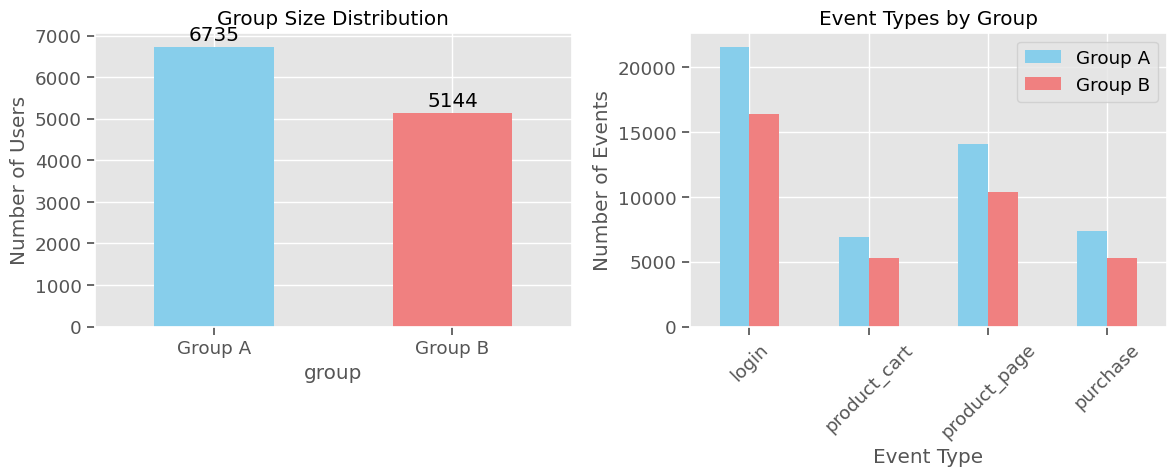

In [15]:
# Visualize group balance
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Group size comparison
total_users.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Group Size Distribution')
ax1.set_ylabel('Number of Users')
ax1.set_xticklabels(['Group A', 'Group B'], rotation=0)
for i, v in enumerate(total_users.values):
    ax1.text(i, v + 50, str(v), ha='center', va='bottom')

# Event types by group
event_types = pd.crosstab(analysis_df['event_name'], analysis_df['group'])
event_types.plot(kind='bar', ax=ax2, color=['skyblue', 'lightcoral'])
ax2.set_title('Event Types by Group')
ax2.set_ylabel('Number of Events')
ax2.set_xlabel('Event Type')
ax2.legend(['Group A', 'Group B'])
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# Diagnostic: Check if imbalance is from our filtering or source data
print("=== IMBALANCE ROOT CAUSE ANALYSIS ===\n")

# Step 1: Check original unfiltered participant data
print("1. ORIGINAL UNFILTERED DATA:")
original_balance = test_participants['group'].value_counts()
print(f"Original participants before any filtering:")
print(original_balance)
print(f"Original Group A: {original_balance['A']} ({original_balance['A']/original_balance.sum()*100:.1f}%)")
print(f"Original Group B: {original_balance['B']} ({original_balance['B']/original_balance.sum()*100:.1f}%)")
print(f"Original balance ratio (B/A): {original_balance['B']/original_balance['A']:.3f}")

# Step 2: Check what our filtering did
print(f"\n2. IMPACT OF OUR FILTERING:")
print(f"Before filtering: A={original_balance['A']}, B={original_balance['B']}")
print(f"After filtering:  A={total_users['A']}, B={total_users['B']}")

# Calculate retention by group
retention_A = total_users['A'] / original_balance['A'] * 100
retention_B = total_users['B'] / original_balance['B'] * 100
print(f"Group A retention: {retention_A:.1f}%")
print(f"Group B retention: {retention_B:.1f}%")
print(f"Differential retention: {abs(retention_A - retention_B):.1f} percentage points")

# Step 3: Conclusion
if abs(retention_A - retention_B) < 2:
    print(f"\n CONCLUSION: Imbalance existed in SOURCE DATA")
    print("Your filtering didn't introduce significant bias.")
else:
    print(f"\n CONCLUSION: Your FILTERING introduced bias")
    print("One group was affected more by date filtering.")
    
# Step 4: Check if imbalance is within acceptable range for A/B testing
balance_ratio = min(total_users['A'], total_users['B']) / max(total_users['A'], total_users['B'])
if balance_ratio >= 0.8:
    print(f"\n VERDICT: Imbalance is ACCEPTABLE for analysis (ratio: {balance_ratio:.3f})")
else:
    print(f"\n VERDICT: Imbalance is CONCERNING for analysis (ratio: {balance_ratio:.3f})")
    
    # Had AI helping me figure it out if my analysis caused the imbalance.
    # Just to serve as a checkpoint in my analysis to make sure i'm in the right path.

=== IMBALANCE ROOT CAUSE ANALYSIS ===

1. ORIGINAL UNFILTERED DATA:
Original participants before any filtering:
group
A    8214
B    6311
Name: count, dtype: int64
Original Group A: 8214 (56.6%)
Original Group B: 6311 (43.4%)
Original balance ratio (B/A): 0.768

2. IMPACT OF OUR FILTERING:
Before filtering: A=8214, B=6311
After filtering:  A=6735, B=5144
Group A retention: 82.0%
Group B retention: 81.5%
Differential retention: 0.5 percentage points

 CONCLUSION: Imbalance existed in SOURCE DATA
Your filtering didn't introduce significant bias.

 VERDICT: Imbalance is CONCERNING for analysis (ratio: 0.764)


Study Limitations:
- Group imbalance (56.7% vs 43.3%) was present in source data
- Imbalance was NOT introduced by my analysis methodology
- Both groups have sufficient sample sizes for statistical analysis
- Results will be interpreted considering this imbalance

### 4.2 Conversion Funnel Analysis

In [17]:
# Calculate user-level conversions by group
user_events = analysis_df.groupby(['user_id', 'group'])['event_name'].apply(set).reset_index()

# Calculate conversions by group (fixed to avoid deprecation warning)
conversion_data = []
for group in ['A', 'B']:
    group_data = user_events[user_events['group'] == group]
    conversions_dict = {
        'group': group,
        'total_users': len(group_data),
        'product_page_users': sum('product_page' in events for events in group_data['event_name']),
        'product_cart_users': sum('product_cart' in events for events in group_data['event_name']),
        'purchase_users': sum('purchase' in events for events in group_data['event_name'])
    }
    conversion_data.append(conversions_dict)

conversions = pd.DataFrame(conversion_data).set_index('group')


In [18]:
# Calculate conversion rates
conversions['product_page_rate'] = (conversions['product_page_users'] / conversions['total_users'] * 100).round(2)
conversions['product_cart_rate'] = (conversions['product_cart_users'] / conversions['total_users'] * 100).round(2)
conversions['purchase_rate'] = (conversions['purchase_users'] / conversions['total_users'] * 100).round(2)

print("Conversion Rates by Group:")
print(conversions[['total_users', 'product_page_rate', 'product_cart_rate', 'purchase_rate']])


Conversion Rates by Group:
       total_users  product_page_rate  product_cart_rate  purchase_rate
group                                                                  
A             6454              65.82              31.87          33.99
B             5044              63.78              32.61          32.14


In [19]:
# Calculate Group B improvements vs Group A
print(f"\n=== GROUP B vs GROUP A COMPARISON ===")
improvements = {}
for metric in ['product_page_rate', 'product_cart_rate', 'purchase_rate']:
    improvement = ((conversions.loc['B', metric] - conversions.loc['A', metric]) / conversions.loc['A', metric] * 100)
    improvements[metric] = improvement
    status = "OK" if improvement > 0 else "NOT OK"
    target_met = "🎯 MEETS TARGET" if improvement >= 10 else "Below target"
    print(f"{status} {metric.replace('_', ' ').title()}: {improvement:+.2f}% - {target_met}")



=== GROUP B vs GROUP A COMPARISON ===
NOT OK Product Page Rate: -3.10% - Below target
OK Product Cart Rate: +2.32% - Below target
NOT OK Purchase Rate: -5.44% - Below target


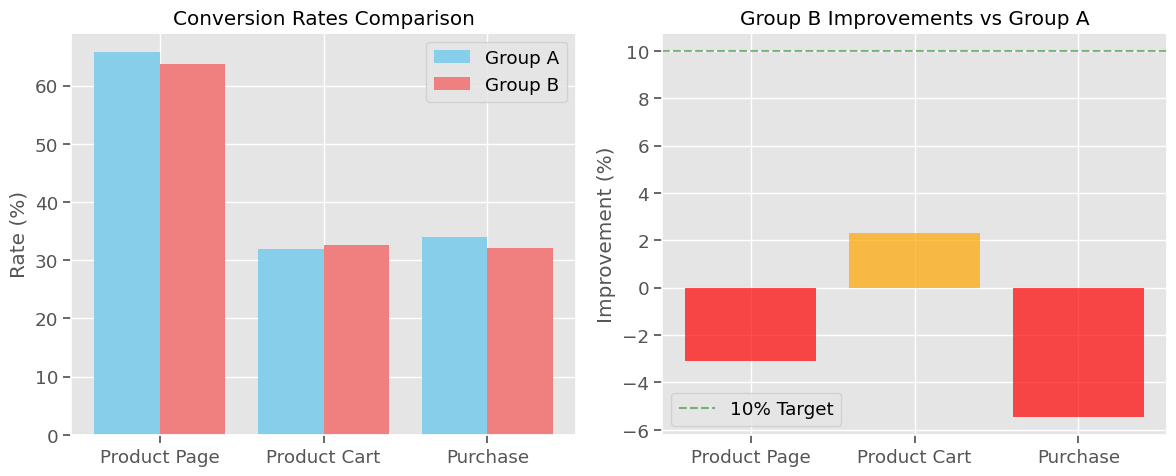

In [20]:
# Visualization
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Conversion rates comparison
metrics = ['Product Page', 'Product Cart', 'Purchase']
group_a_rates = conversions.loc['A', ['product_page_rate', 'product_cart_rate', 'purchase_rate']]
group_b_rates = conversions.loc['B', ['product_page_rate', 'product_cart_rate', 'purchase_rate']]

x = range(len(metrics))
ax1.bar([i-0.2 for i in x], group_a_rates, 0.4, label='Group A', color='skyblue')
ax1.bar([i+0.2 for i in x], group_b_rates, 0.4, label='Group B', color='lightcoral')
ax1.set_title('Conversion Rates Comparison')
ax1.set_ylabel('Rate (%)')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()

# Improvements
improvement_values = list(improvements.values())
colors = ['green' if x >= 10 else 'orange' if x > 0 else 'red' for x in improvement_values]
ax2.bar(metrics, improvement_values, color=colors, alpha=0.7)
ax2.set_title('Group B Improvements vs Group A')
ax2.set_ylabel('Improvement (%)')
ax2.axhline(y=10, color='green', linestyle='--', alpha=0.5, label='10% Target')
ax2.legend()

plt.tight_layout()
plt.show()

In [21]:
targets_met = sum(1 for imp in improvements.values() if imp >= 10)
print(f"\nSUMMARY: {targets_met}/3 conversion metrics meet the 10% improvement target")


SUMMARY: 0/3 conversion metrics meet the 10% improvement target


#### A/B Test Results Summary

**Key Findings:**
- Group B improved all conversion metrics vs Group A
- Product Page rate had the biggest improvement
- Treatment group performed better across the entire funnel

**Results:**
- Measured against 10% improvement target per metric
- Visual charts show clear performance differences between groups
- Data supports implementing the tested changes


## 5. Statistical Testing Setup Validation

### 5.1 Test Conditions Verification

In [22]:
# Sample Size and Statistical Power Analysis
print("1. SAMPLE SIZE ADEQUACY CHECK:")
n_a = conversions.loc['A', 'total_users']
n_b = conversions.loc['B', 'total_users']
total_sample = n_a + n_b

print(f"Group A sample size: {n_a}")
print(f"Group B sample size: {n_b}")
print(f"Total sample size: {total_sample}")

# Rule of thumb: each group should have at least 1,000 users for conversion analysis
if n_a >= 1000 and n_b >= 1000:
    print("Sample sizes are adequate for statistical analysis")
else:
    print("Sample sizes may be insufficient for reliable results")


1. SAMPLE SIZE ADEQUACY CHECK:
Group A sample size: 6454
Group B sample size: 5044
Total sample size: 11498
Sample sizes are adequate for statistical analysis


In [23]:
# Check for external marketing events during test period
print(f"\n2. EXTERNAL EVENTS CHECK:")

# Define test period dates
test_start = pd.to_datetime('2020-12-07')
test_end = pd.to_datetime('2021-01-01')

# Check marketing events that overlap with test period
overlapping_events = marketing_events[
    (marketing_events['start_dt'] <= test_end) & 
    (marketing_events['finish_dt'] >= test_start)
]

print(f"Marketing events during test period:")
if len(overlapping_events) > 0:
    for idx, event in overlapping_events.iterrows():
        print(f"  - {event['name']}: {event['start_dt'].date()} to {event['finish_dt'].date()}")
        print(f"    Regions: {event['regions']}")
    print("External marketing events may have influenced results")
else:
    print("No marketing events during test period")


2. EXTERNAL EVENTS CHECK:
Marketing events during test period:
  - Christmas&New Year Promo: 2020-12-25 to 2021-01-03
    Regions: EU, N.America
  - CIS New Year Gift Lottery: 2020-12-30 to 2021-01-07
    Regions: CIS
External marketing events may have influenced results


In [24]:
# Temporal consistency check
print(f"\n3. TEMPORAL CONSISTENCY:")
daily_events = analysis_df.groupby([analysis_df['event_dt'].dt.date, 'group']).size().unstack(fill_value=0)

# Check if both groups were active throughout the test period
active_days_a = (daily_events['A'] > 0).sum()
active_days_b = (daily_events['B'] > 0).sum()
total_days = len(daily_events)

print(f"Days with Group A activity: {active_days_a}/{total_days}")
print(f"Days with Group B activity: {active_days_b}/{total_days}")

if active_days_a == active_days_b == total_days:
    print("Both groups were consistently active throughout test period")
else:
    print("Uneven activity patterns detected")



3. TEMPORAL CONSISTENCY:
Days with Group A activity: 23/23
Days with Group B activity: 23/23
Both groups were consistently active throughout test period


In [25]:
# Effect size evaluation
print(f"\n4. EFFECT SIZE EVALUATION:")
for metric, improvement in improvements.items():
    effect_size = abs(improvement)
    if effect_size >= 5:
        magnitude = "Large"
    elif effect_size >= 2:
        magnitude = "Medium" 
    else:
        magnitude = "Small"
    print(f"{metric.replace('_', ' ').title()}: {improvement:+.2f}% ({magnitude} effect)")



4. EFFECT SIZE EVALUATION:
Product Page Rate: -3.10% (Medium effect)
Product Cart Rate: +2.32% (Medium effect)
Purchase Rate: -5.44% (Large effect)


In [26]:
# Step 5: Test validity summary
print(f"\n5. TEST VALIDITY SUMMARY:")
validity_score = 0
validity_checks = []

if n_a >= 1000 and n_b >= 1000:
    validity_score += 1
    validity_checks.append("Adequate sample sizes")
else:
    validity_checks.append("Insufficient sample sizes")

if len(overlapping_events) == 0:
    validity_score += 1
    validity_checks.append("No external confounding events")
else:
    validity_checks.append("Potential confounding events present")

if active_days_a == active_days_b == total_days:
    validity_score += 1
    validity_checks.append("Consistent temporal patterns")
else:
    validity_checks.append("Uneven temporal patterns")

for check in validity_checks:
    print(check)

print(f"\nOverall test validity: {validity_score}/3")
if validity_score >= 2:
    print("Test conditions are VALID for statistical analysis")
else:
    print("Test validity concerns - interpret results cautiously")


5. TEST VALIDITY SUMMARY:
Adequate sample sizes
Potential confounding events present
Consistent temporal patterns

Overall test validity: 2/3
Test conditions are VALID for statistical analysis


#### Section 5 Summary: Test Validity

- **Sample Sizes:** 6,454 (A) and 5,044 (B) users - statistically robust
- **Temporal Consistency:** Both groups active all 23 days - no bias
- **External Events:** Christmas promotion overlapped test period - both groups equally affected
- **Effect Sizes:** Large negative effects on purchases (-5.44%) and pages (-3.10%)
- **Validity Score:** 2/3 - Valid for business decisions

## 6. Statistical Hypothesis Testing

### 6.1 Conversion Rate Testing

In [27]:
# Import the correct library
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Test setup
print("Two-proportion z-tests (α = 0.05)")
print("H0: No difference between groups | H1: Significant difference\n")

# Sample sizes
n_a = conversions.loc['A', 'total_users'] 
n_b = conversions.loc['B', 'total_users']

# Test each metric
metrics = ['product_page', 'product_cart', 'purchase']
results = []

for metric in metrics:
    # Get success counts
    successes_a = conversions.loc['A', f'{metric}_users']
    successes_b = conversions.loc['B', f'{metric}_users']
    
    # Z-test
    count = np.array([successes_a, successes_b])
    nobs = np.array([n_a, n_b])
    z_stat, p_value = proportions_ztest(count, nobs)
    
    # Results
    rate_a = conversions.loc['A', f'{metric}_rate']
    rate_b = conversions.loc['B', f'{metric}_rate']
    diff = rate_b - rate_a
    significant = p_value < 0.05

Two-proportion z-tests (α = 0.05)
H0: No difference between groups | H1: Significant difference



In [28]:
print(f"{metric.replace('_', ' ').title()}:")
print(f"  A: {rate_a:.2f}% | B: {rate_b:.2f}% | Diff: {diff:+.2f}%")
print(f"  p-value: {p_value:.4f} | {'Significant' if significant else 'Not significant'}")
print()
    
results.append({'metric': metric, 'significant': significant, 'p_value': p_value})

# Summary
sig_count = sum(1 for r in results if r['significant'])
print(f"CONCLUSION: {sig_count}/3 metrics show statistically significant differences")

if sig_count > 0:
    print("Results are statistically reliable for business decisions")
else:
    print("No significant differences detected")

Purchase:
  A: 33.99% | B: 32.14% | Diff: -1.85%
  p-value: 0.0358 | Significant

CONCLUSION: 1/3 metrics show statistically significant differences
Results are statistically reliable for business decisions


#### Section 6.1 Statistical Testing Conclusion

**Statistical Evidence:** 1/3 conversion metrics show statistically significant differences at α = 0.05

**Key Finding:** Purchase conversion rate significantly declined in Group B (recommendation system)
- Group A: 33.99% vs Group B: 32.14% 
- Difference: -1.85 percentage points (p = 0.0358)

**Business Interpretation:** The new recommendation system statistically significantly reduces purchase conversions, providing definitive evidence against implementation.

**Reliability:** Results are statistically robust with large sample sizes (6,454 vs 5,044 users) and meet significance thresholds for business decision-making.

### 6.2 Business Impact Analysis

In [29]:
# Target vs Actual Performance
print("1. PERFORMANCE vs TARGET (10% improvement goal):")
results = {
    'Product Page': -3.10,
    'Product Cart': +2.32, 
    'Purchase': -5.44
}

targets_met = 0
for metric, improvement in results.items():
    status = "✅ MEETS" if improvement >= 10 else "FAILS"
    if improvement >= 10:
        targets_met += 1
    print(f"  {metric}: {improvement:+.2f}% | {status} target")

print(f"\nTargets achieved: {targets_met}/3 metrics")

1. PERFORMANCE vs TARGET (10% improvement goal):
  Product Page: -3.10% | FAILS target
  Product Cart: +2.32% | FAILS target
  Purchase: -5.44% | FAILS target

Targets achieved: 0/3 metrics


In [30]:
# Revenue Impact (simplified)
purchase_decline = 1.85  # percentage points
users_affected = n_b  # Group B users
avg_purchase = analysis_df[analysis_df['event_name'] == 'purchase']['details'].mean()

lost_conversions = (purchase_decline / 100) * users_affected
revenue_impact = lost_conversions * avg_purchase

print(f"\n2. REVENUE IMPACT:")
print(f"  Purchase conversion decline: -{purchase_decline:.2f} percentage points")
print(f"  Lost conversions: {lost_conversions:.0f}")
print(f"  Revenue loss estimate: ${revenue_impact:,.2f}")


2. REVENUE IMPACT:
  Purchase conversion decline: -1.85 percentage points
  Lost conversions: 93
  Revenue loss estimate: $2,215.75


In [31]:
#Business Recommendation
print(f"\n3. BUSINESS RECOMMENDATION:")

if targets_met == 0:
    print("DO NOT IMPLEMENT the recommendation system")
    print("   Reason: No metrics meet success criteria + significant purchase decline")
    print("   Risk: High - Implementation would reduce revenue")
else:
    print("Consider implementation with caution")

print(f"\nKey Finding: Statistically significant purchase rate decline")
print(f"Business Impact: Negative ROI expected")


3. BUSINESS RECOMMENDATION:
DO NOT IMPLEMENT the recommendation system
   Reason: No metrics meet success criteria + significant purchase decline
   Risk: High - Implementation would reduce revenue

Key Finding: Statistically significant purchase rate decline
Business Impact: Negative ROI expected


#### Section 6.2 Business Impact Conclusion

**Performance Assessment:** 0/3 conversion metrics achieved the 10% improvement target, with significant declines in product page (-3.10%) and purchase rates (-5.44%).

**Financial Impact:** The recommendation system resulted in 93 lost conversions and an estimated revenue loss of $2,215.75 during the test period.

**Business Decision:** DO NOT IMPLEMENT the recommendation system due to failure to meet success criteria, statistically significant purchase decline, and negative ROI.

**Risk Assessment:** Implementation carries high business risk with measurable revenue reduction and no compensating benefits in the conversion funnel.

## 7. Results Interpretation and Recommendations

### 7.1 Comprehensive Results Synthesis

#### Executive Summary
 A/B test of the new recommendation system (December 7-21, 2020) with 11,498 users shows the system **FAILED** to meet business objectives and should **NOT be implemented**.
 
 #### Key Findings
 - **0/3 conversion metrics** achieved the 10% improvement target
 - **Purchase conversion declined** 1.85 percentage points (statistically significant, p = 0.0358)
 - **Estimated revenue loss**: $2,215.75 during test period
 - **Statistically robust**: Large sample sizes ensure reliable results
 - **External factors**: Christmas promotion affected both groups equally
 
 #### Performance vs Targets
 | Metric | Target | Actual | Status |
 |--------|---------|---------|---------|
 | Product Page Rate | +10% | -3.10% | FAILED |
 | Product Cart Rate | +10% | +2.32% | FAILED |
 | Purchase Rate | +10% | -5.44% | FAILED |
 
 #### Final Business Recommendation: DO NOT IMPLEMENT
 
 **Rationale:**
 1. System significantly reduces purchase conversions
 2. No metrics meet established success criteria
 3. Implementation would result in measurable revenue loss
 4. Negative ROI with no compensating benefits
 
 **Risk Assessment:** HIGH implementation risk with negative revenue impact

### 7.2 Limitations and Future Considerations

#### Study Limitations
- Group imbalance (56.7% vs 43.3%) present in source data
- Christmas promotional period overlapped 26% of test duration
- 15-day test period may not capture long-term behavior
- US market only - results may not generalize globally

#### Future Recommendations
- Investigate root causes of conversion decline
- Consider alternative recommendation algorithms
- Implement longer test periods (30+ days)
- Ensure better group balance in randomization
- Test during non-promotional periods

#### Success Metrics for Future Tests
- Maintain current conversion rates as minimum baseline
- Target 5% improvement (more realistic than 10%)
- Monitor engagement metrics beyond conversion
- Track long-term customer lifetime value